In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc

In [2]:
data=pd.read_csv("kaggle_diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [3]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [4]:
df=data.copy()

In [5]:
df.drop("Pregnancies",axis=1,inplace=True)

In [6]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]= df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [7]:
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,138.0,62.0,35.0,NaN,33.6,0.127,47,1
1,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,145.0,NaN,NaN,NaN,44.2,0.630,31,1
3,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,139.0,62.0,41.0,480.0,40.7,0.536,21,0


In [8]:
df.isnull().sum()

Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
# Replacing NaN value by mean, median depending upon distribution
df["Glucose"].fillna(df["Glucose"].mean(),inplace=True)
df["BloodPressure"].fillna(df["BloodPressure"].median(),inplace=True)
df["SkinThickness"].fillna(df["SkinThickness"].median(),inplace=True)
df["Insulin"].fillna(df["Insulin"].median(),inplace=True)
df["BMI"].fillna(df["BMI"].median(),inplace=True)

In [10]:
df["Outcome"].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

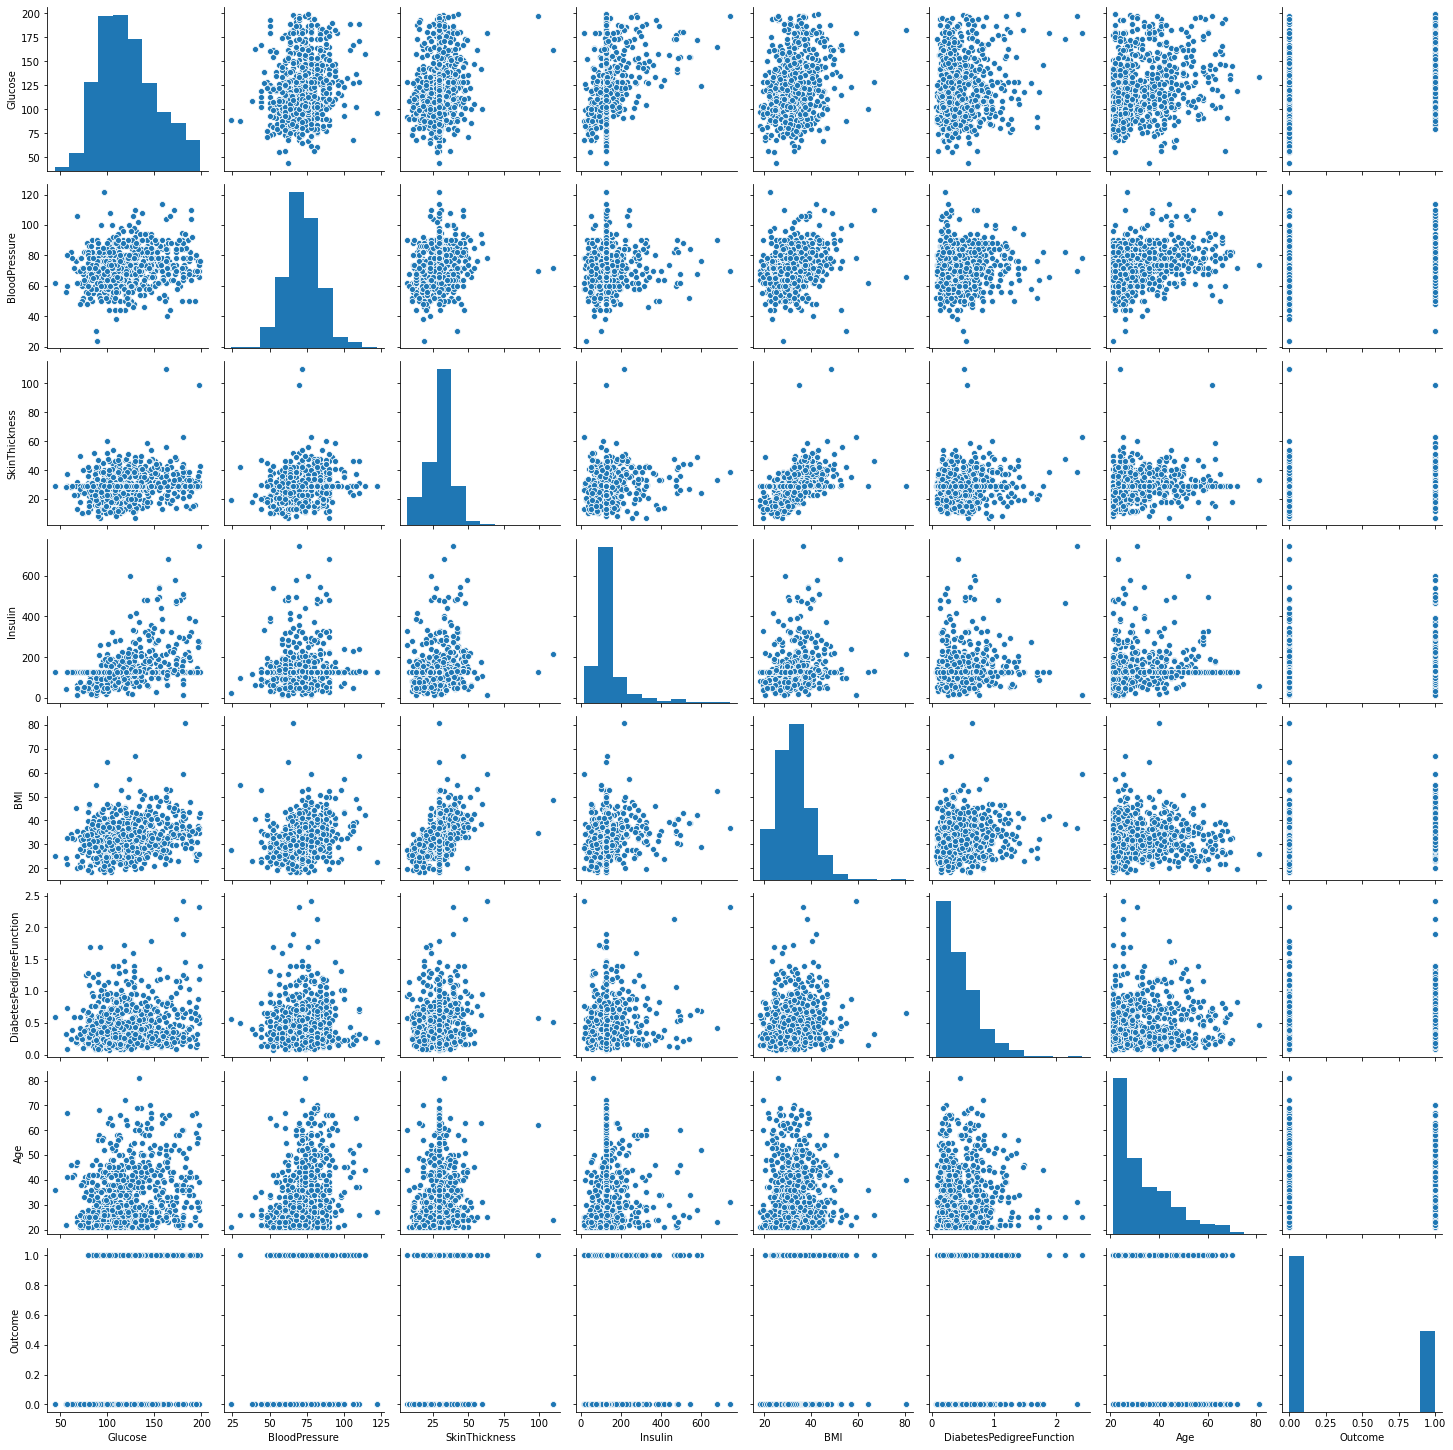

In [11]:
sns.pairplot(df)

In [12]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


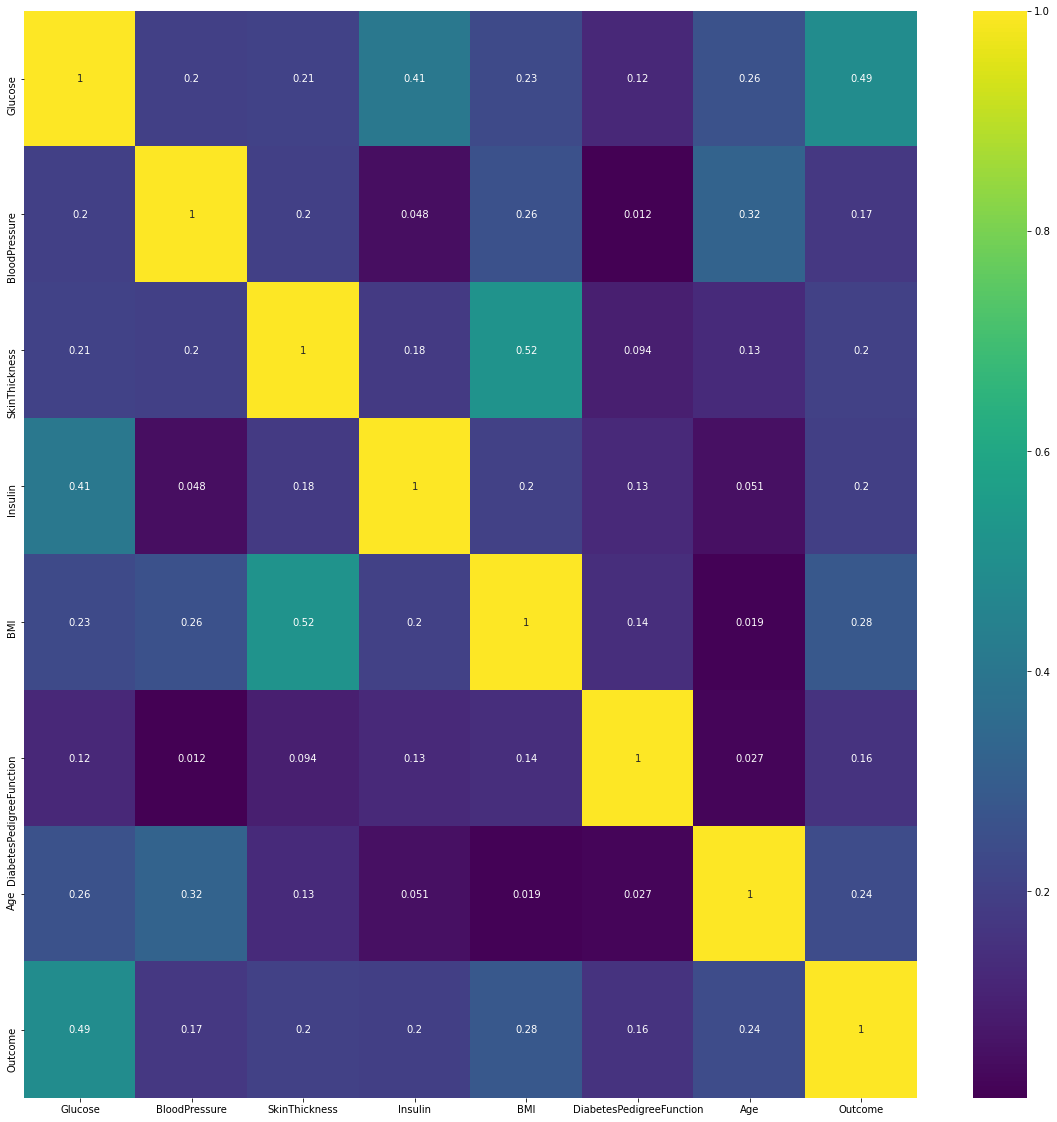

In [13]:
heatmp=df.corr()
top_corr=heatmp.index
plt.figure(figsize=(20,20))
a=sns.heatmap(df[top_corr].corr(),annot=True,cmap="viridis")

In [14]:
df.groupby('Outcome').median()["Age"]

Outcome
0    26
1    36
Name: Age, dtype: int64

# split the data into dependent and independent variable

In [15]:
x=df.iloc[:,0:7]
x.head(2)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,138.0,62.0,35.0,126.0,33.6,0.127,47
1,84.0,82.0,31.0,125.0,38.2,0.233,23


In [16]:
y=df.iloc[:,7]
y.head()

0    1
1    0
2    1
3    1
4    0
Name: Outcome, dtype: int64

# feature important

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [18]:
print(model.feature_importances_)

[0.26915606 0.10827488 0.09326825 0.10056443 0.15070982 0.12459257
 0.15343398]


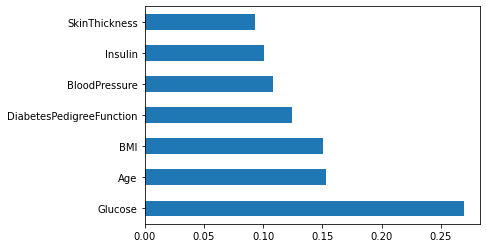

In [19]:
## plot the features importance for better visualization
f1=pd.Series(model.feature_importances_,index=x.columns)
f1.nlargest(8).plot(kind='barh')
plt.show()

In [20]:
# split the data into trian and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier  
rf_model=RandomForestClassifier(n_estimators=20, criterion='entropy')
rf_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [22]:
y_pred=rf_model.predict(x_test)

In [23]:
y_pred_train=rf_model.predict(x_train)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
print("Accuraccy Score is:",accuracy_score(y_pred,y_test))
print("Accuraccy Score is:",accuracy_score(y_pred_train,y_train))

Accuraccy Score is: 0.965
Accuraccy Score is: 0.9992857142857143


In [37]:
from sklearn.metrics import confusion_matrix
print(pd.DataFrame(confusion_matrix(y_pred,y_test),index=["actual 0","actual 1"],columns=["pred 0","pred 1"]))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


          pred 0  pred 1
actual 0     377       9
actual 1      12     202
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       389
           1       0.94      0.96      0.95       211

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.97      0.96      0.97       600



In [27]:
from sklearn.metrics import roc_curve

In [28]:
fpr,tpr,threshold = roc_curve(y_test,y_pred)

In [29]:
print(fpr,"\n")
print(tpr,"\n")
print(threshold)

[0.         0.03084833 1.        ] 

[0.         0.95734597 1.        ] 

[2 1 0]


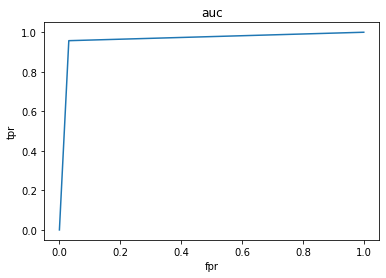

In [30]:
plt.plot(fpr,tpr)
plt.title("auc")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

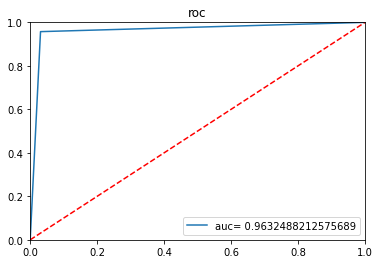

In [31]:
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_test,y_pred)
plt.title("roc")
plt.plot(fpr,tpr,label="auc= "+str(auc))
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

In [32]:
import joblib as jb

In [33]:
jb.dump(rf_model,"diabetes_pred.pkl")

['diabetes_pred.pkl']